In [1]:
import pandas as pd
import requests
import os
import glob
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
# i used stackoverflow, geeksforgeeks,df.plot() doucmentaion, and discourse of FWD to help me in implementing different parts of the project

In [2]:
#will not use in the first time, but once you run 'gathering' code , you can after that upload your data directly using these lines of code
twitter_arch_enhanc_df = pd.read_csv('twitter-archive-enhanced.csv')



# Gathering

- Downloading "image-predictions.tsv" from internet and saving it . 

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) #requesting the file using the url
file_name = url.split('/')[-1]

if not os.path.isfile(file_name): #checking if the file exist locally
    with open(file_name,mode = 'wb') as file : #create file
        file.write(response.content) #write the content in the file
        

image_predictions_df = pd.read_csv(file_name, sep='\t')

- using Twitter API, and tweets id , i downloaded tweets information  as JSONs Files, saved locally in  the device , read it again ,extracted (retweet_counts, favourite likes, id) and created dataframe holds those values

In [4]:
if not os.path.isfile('tweet_json.txt'):
    df_list = []     #use to hold  retweet_counts, id, and favourite_counts values to tranform to dataframe
    data={}          # creating dicit to hold the tweet information in it
    data['tweets_data']=[]  
    counter = 0      # to keep track of how many tweets request sent

    CONSUMER_KEY = 'omxYFPtY63AcoOsk6u6NwTY2q'
    CONSUMER_SECRET = 'PLEB9JrFBS5EjEvDYlU2stYdYQbWXGQkbA2eENqiaSkbURo8O2'
    access_token = '1175147464611041280-wx276YBa4gQAL5iG05h4rHTBdRsO4w'
    access_secret = 'qEiYPoQRCtynkGTG6YwGQvaTdNuxjvWisG5ZeBHYUfa2v'

    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) #creating object
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    for tweet_id in tweet_ids :  #looping throw tweets id  to download each tweet information

        # using try-except in case that the tweet has been deleted
        try : 
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            data['tweets_data'].append(tweet._json)
            print(str(counter) + " of tweets SUCCEEDED !, and the ID :  " + str(tweet._json['id']) )
            counter+=1

        except : # putting 'None' values in the desired data if it has been deleted
            print(str(counter) + " of tweets FAILED !, and the ID :  " + str(tweet_id) )
            
            #i made a mistake here that instead of wrote "favorite_count" i wrote 'favourites_count' so i had to 
            #make a "try-except" while loading data from 'tweet_json.txt' dataframe to take  
            data['tweets_data'].append({'id' :tweet_id,'retweet_count':None ,'favorite_count':None})
            counter+=1  
            continue 
    

    with open('tweet_json.txt','w') as handle_write : # write the list of dicits in a .txt file
        json.dump(data, handle_write)

    df_list = []  

    with open('tweet_json.txt','r') as handle_read : 
        data_loaded = json.load(handle_read) # load the data

        for line in data_loaded['tweets_data']: # looping through dicits in the list to extract tweets informations
        
            retweet_count=line['retweet_count']
            favorite_count=line["favorite_count"]
            ID=line['id']
            df_list.append({'tweet_id':ID ,'retweet_count': retweet_count ,'favorite_count':favorite_count})



    addiontal_info_df = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])
    addiontal_info_df.to_csv('addiontal_info.csv',index=False)
    
addiontal_info_df =pd.read_csv('addiontal_info.csv')

# Asseesing

In [5]:
twitter_arch_enhanc_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
addiontal_info_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7549.0,35712.0
1,892177421306343426,5594.0,30872.0
2,891815181378084864,3705.0,23207.0
3,891689557279858688,7730.0,39002.0
4,891327558926688256,8332.0,37260.0


In [7]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
twitter_arch_enhanc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
addiontal_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null int64
retweet_count     2329 non-null float64
favorite_count    2329 non-null float64
dtypes: float64(2), int64(1)
memory usage: 55.3 KB


In [10]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#donminatr different than 10 , nomintor values very haigh 1776 or very low 0
print(twitter_arch_enhanc_df.rating_numerator.value_counts())
print(twitter_arch_enhanc_df.rating_denominator.value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [12]:
#extracting wrong values in 'rating_numerator'and 'rating_denominator' columns in rows 2335, 1165, and 516
print(twitter_arch_enhanc_df.loc[2335]['text':'rating_denominator'])
print(twitter_arch_enhanc_df.iloc[1165]['text':'rating_denominator'])
print(twitter_arch_enhanc_df.iloc[516]['text':'rating_denominator'])

text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              1
rating_denominator                                                            2
Name: 2335, dtype: object
text                          Happy 4/20 from the squad! 13/10 for all https...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/722974582...
rating_numerat

In [13]:
#extracting 'rating_numerator' without the friction part
print(twitter_arch_enhanc_df.iloc[45]['text'])
print(twitter_arch_enhanc_df.iloc[45]['rating_numerator'])

print('\n')

#in row 200, wrong classified dog  doggo anf floofer instead of a floofer.
print(twitter_arch_enhanc_df.iloc[200]['text'])
print(twitter_arch_enhanc_df.iloc[200]['doggo':'puppo'])

print('\n')

#row 191, wrong classified dog a doggo instead of a puppo.
print(twitter_arch_enhanc_df.iloc[191]['text'])
print(twitter_arch_enhanc_df.iloc[191]['doggo':'puppo'])

print('\n')

# contain the signer (snop dogg).
print(twitter_arch_enhanc_df.iloc[188]['text'])
print(twitter_arch_enhanc_df.iloc[188]['expanded_urls'])

print('\n')

#outlier
print(twitter_arch_enhanc_df.iloc[979]['text'])
print(twitter_arch_enhanc_df.iloc[979]['expanded_urls'])

print('\n')

#is not about rating a dog, it's about donating 
print(twitter_arch_enhanc_df.iloc[516 ]['text'])
print(str(twitter_arch_enhanc_df.iloc[516 ]['rating_numerator']) + "/" +str(twitter_arch_enhanc_df.iloc[516 ]['rating_denominator']))



This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
5


At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
doggo        doggo
floofer    floofer
pupper        None
puppo         None
Name: 200, dtype: object


Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
doggo      doggo
floofer     None
pupper      None
puppo      puppo
Name: 191, dtype: object


@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
nan


This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
https://twitter.com/dog_rates/status/749981277374128128/photo/1


Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking an

In [14]:
#see if stages are mutually exclusive or not
df1 = twitter_arch_enhanc_df.query('doggo != "None" and floofer != "None"  ' )
df2 = twitter_arch_enhanc_df.query('doggo != "None" and pupper != "None"  ' )
df3 = twitter_arch_enhanc_df.query('doggo != "None" and puppo != "None"  ' )
df4 = twitter_arch_enhanc_df.query('floofer != "None" and pupper != "None"  ' )
df5 = twitter_arch_enhanc_df.query('floofer!= "None" and puppo != "None"  ' )
df6 = twitter_arch_enhanc_df.query('pupper!= "None" and puppo != "None"  ' )

### Quality

- 'twitter_arch_enhanc_df' : having denominator values diffierent than 10  in 'rating_denominator' column.

- 'twitter_arch_enhanc_df' : extracting wrong values  in 'rating_numerator'and 'rating_denominator' columns in rows  2335, 1165, and 516

- 'twitter_arch_enhanc_df' : extracting 'rating_numerator' without the friction part

- 'twitter_arch_enhanc_df' : values exist in columns related to retweets and replays

- 'twitter_arch_enhanc_df' : "None" instead NaN in (name, doggo, floofer, pupper, puppo).

- 'twitter_arch_enhanc_df' : wrong values in 'name' column and 'None' value instead of NaN

- 'twitter_arch_enhanc_df' : wrong data type in 'timestamp' and 'retweeted_status_timestamp' columns.	

- 'twitter_arch_enhanc_df' : 'source' column's data inside HTML 'a' element.

- 'twitter_arch_enhanc_df' : 'tweet_id' column wrong data type int instead of string.

- 'twitter_arch_enhanc_df' : in row 200, wrong classified dog a doggo instead of a floofer.

- 'twitter_arch_enhanc_df' : in row 191, wrong classified dog a doggo instead of a puppo.	 

- 'twitter_arch_enhanc_df':  in row 188  contain the signer (snop dogg).

- 'twitter_arch_enhanc_df':  the row 516 is not about rating a dog, it's about donating 

- 'twitter_arch_enhanc_df':  the row 979 is outlier

- 'image_predictions_df' : 'p1,p2,p3' columns wrong data type objec instead of category 

- 'image_predictions_df' : 'tweet_id' column wrong data type int instead of string
- 'addiontal_info_df' : Nan values in retweet_count and favorite_count

- 'addiontal_info_df' : wrong data types in retweet_count and favorite_count column float instead of int

- 'addiontal_info_df' : wrong data type in tweet_id int instead string 

### Tidness
- 'twitter_arch_enhanc_df' : 1 variable in 4 coulmn (doggo, floofer, pupper, puppo) .
- 'image_predictions_df' : p1,2,3, p_conf1,2,3 , p_dog1,2,3,  instead of just p, p_cong, p_fog .
- 'addiontal_info_df' : not perfoming integrity 


# Cleaning 

### define 
- merging twitter_arch_enhanc_df, addiontal_info_df
- making copies to be cleaned

### code

In [15]:
twitter_all_data_df=pd.merge(twitter_arch_enhanc_df,addiontal_info_df,how='inner',left_on='tweet_id',right_on='tweet_id')
twitter_all_data_df_copy= twitter_all_data_df.copy()
image_predictions_df_copy = image_predictions_df.copy()

### test

In [16]:
twitter_all_data_df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7549.0,35712.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5594.0,30872.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3705.0,23207.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,7730.0,39002.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8332.0,37260.0


### define
- replacing (doggo, floofer, pupper, puppo) columns with just one column called 'stage' 
- creating stage column with NaN values and assign existing stages 


### code

In [17]:
#repalcing 'None' values in ('doggo','puppo','pupper','floofer') columns to empty string ''
twitter_all_data_df_copy.loc[:,'doggo':'puppo']=twitter_all_data_df_copy.loc[:,'doggo':'puppo'].replace('None',"")

# adding ('doggo','puppo','pupper','floofer') values in new column called 'stage'
twitter_all_data_df_copy['stage']=twitter_all_data_df_copy['doggo'] + twitter_all_data_df_copy['pupper'] + twitter_all_data_df_copy['puppo'] + twitter_all_data_df_copy['floofer']

#replace empty strings in 'stage' column to NaN
twitter_all_data_df_copy['stage'] = twitter_all_data_df_copy['stage'].replace("",np.nan)

#drop ('doggo','puppo','pupper','floofer') columns
twitter_all_data_df_copy.drop(['doggo','puppo','pupper','floofer'],axis=1,inplace=True)

#getting index of 'doggopuppo' value in stage column and change to floofer because it as wrong extracted
temp=twitter_all_data_df_copy[twitter_all_data_df_copy.stage == 'doggopuppo'].index
twitter_all_data_df_copy['stage'][temp] = 'floofer' 

#getting index of 'doggofloofer' value in stage column and change to puppo because it as wrong extracted
temp=twitter_all_data_df_copy[twitter_all_data_df_copy.stage == 'doggofloofer'].index
twitter_all_data_df_copy['stage'][temp] = 'puppo' 

# correct values in 'stage' column that has two values to separate between them by commas
temp = twitter_all_data_df_copy['stage'][twitter_all_data_df_copy.stage == 'doggopupper'].index
twitter_all_data_df_copy['stage'][temp]= twitter_all_data_df_copy['stage'][temp].replace('doggopupper','doggo,pupper')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### define 
- changing stage column data type to categoraical 
- changing timestamp column data type to time 
- changing retweet_count column data type to int
- changing favorite_count column data type to int 
- changing tweet_id column data type to string
- changing source column data type to categoraical 


### code

In [18]:
twitter_all_data_df_copy['stage'] = twitter_all_data_df_copy['stage'].astype('category')
twitter_all_data_df_copy['timestamp'] = pd.to_datetime(twitter_all_data_df_copy['timestamp']) 
twitter_all_data_df_copy['retweet_count'] = pd.to_numeric(twitter_all_data_df_copy['retweet_count'],downcast='integer')
twitter_all_data_df_copy['favorite_count'] = pd.to_numeric(twitter_all_data_df_copy['favorite_count'],downcast='integer')
twitter_all_data_df_copy['tweet_id'] = twitter_all_data_df_copy['tweet_id'].astype(str)
twitter_all_data_df_copy['source'] = twitter_all_data_df_copy['source'].astype('category')

### test

In [19]:
twitter_all_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 2329 non-null float64
favorite_count                2329 non-null float64
stage                         380 non-null category
dtypes: category(2), datetime64[ns](1), float64(6), int64(2), object(

### define 
sloving : detecing replaying, retweets, and tweets without images and dropping them 

- find values in replaying column and drop it 
- find values in retweets column and drop it
- find values in tweets column that don't havd images and drop it 
- drop (in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') columns

### code 

In [20]:
    checking = twitter_all_data_df_copy.query('in_reply_to_status_id != "NaN" and in_reply_to_user_id != "NaN" ' ).index 
twitter_all_data_df_copy.drop(checking,inplace=True)
twitter_all_data_df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'],axis=1,inplace=True)

checking = twitter_all_data_df_copy.query('retweeted_status_id != "NaN" and retweeted_status_user_id != "NaN" ' ).index 
twitter_all_data_df_copy.drop(checking,inplace=True)
twitter_all_data_df_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True, axis=1)


checking =twitter_all_data_df_copy[twitter_all_data_df_copy.expanded_urls.isnull()].index 
twitter_all_data_df_copy.drop(checking,inplace=True)


### test

In [21]:
twitter_all_data_df_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7549.0,35712.0,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5594.0,30872.0,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3705.0,23207.0,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7730.0,39002.0,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8332.0,37260.0,NaN


### define
- extracting information from HTML tag in 'source' column


### code

In [22]:
twitter_all_data_df_copy['source']=twitter_all_data_df_copy['source'].str.extract('>(.*)<')
twitter_all_data_df_copy['source'] = twitter_all_data_df_copy['source'].astype('category')

### Test

In [23]:
twitter_all_data_df_copy['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### define 
- delete row 2074 that has the singer snop dogg
- delete row 979 that contain rating "1766" becaues it is outlier
- delete row 516 because the tweet is not about rating dogs , it's about donating
- fix ratings in 2335,1165 rows
- extracing the nominator and denominators values including frictions part
- inspecting nominator values that less than denominator to see if there was error in extraction the ratings and replace with the right one 
 
- normalize all denominator values to be 10 and fix coresponding nominator 


### code

In [24]:
twitter_all_data_df_copy[twitter_all_data_df_copy.rating_numerator > 20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,3214.0,12217.0,NaN
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,1447.0,5366.0,NaN
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,6134.0,18307.0,NaN
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,1607.0,6548.0,pupper
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,2188.0,4753.0,NaN
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,2427.0,5070.0,NaN
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,1237.0,3763.0,NaN
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,204.0,2331.0,NaN
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,721.0,2779.0,NaN
1254,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,546.0,2259.0,NaN


In [25]:
#droping the rows that has prblems 
tmp=twitter_all_data_df_copy[twitter_all_data_df_copy.rating_numerator ==420].index
twitter_all_data_df_copy.drop(tmp,inplace=True)

tmp=twitter_all_data_df_copy[twitter_all_data_df_copy.rating_numerator == 1776].index
twitter_all_data_df_copy.drop(tmp,inplace=True)

tmp=twitter_all_data_df_copy[twitter_all_data_df_copy.rating_numerator == 24].index
twitter_all_data_df_copy.drop(tmp,inplace=True)

#extracing ratings again including frictions part                              
twitter_all_data_df_copy['rating_numerator'] = twitter_all_data_df_copy.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')
twitter_all_data_df_copy['rating_denominator'] = twitter_all_data_df_copy.text.str.extract('\d+\.?\d?\d?\/(\d{1,3})', expand = False).astype('float')

# 2335 wrong extraction 1/2 instead of 9/10
twitter_all_data_df_copy['rating_numerator'][2335] = 9
twitter_all_data_df_copy['rating_denominator'][2335] = 10 

print(twitter_all_data_df_copy[twitter_all_data_df_copy.rating_denominator != 10]['text'][1165])
#1165  wrong extraction 4/20 instead of 13/10
twitter_all_data_df_copy['rating_numerator'][1165] = 13
twitter_all_data_df_copy['rating_denominator'][1165] = 10 

#normlize all denominators to be 10 , and fixing coresponding nominators
var= twitter_all_data_df_copy[twitter_all_data_df_copy['rating_denominator'] != 10].index
twitter_all_data_df_copy['rating_numerator'][var] = twitter_all_data_df_copy['rating_numerator'][var] * 10 /twitter_all_data_df_copy['rating_denominator'][var]
twitter_all_data_df_copy['rating_denominator'][var] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### test

In [26]:
print(twitter_all_data_df_copy.rating_numerator.value_counts())
print(twitter_all_data_df_copy.rating_denominator.value_counts())

12.000000    489
10.000000    436
11.000000    418
13.000000    288
9.000000     154
8.000000      98
7.000000      51
14.000000     38
5.000000      33
6.000000      32
3.000000      19
4.000000      15
2.000000       9
1.000000       4
9.750000       1
0.000000       1
11.260000      1
11.270000      1
13.500000      1
8.181818       1
6.363636       1
Name: rating_numerator, dtype: int64
10.0    2091
Name: rating_denominator, dtype: int64


### define 
- replacing 'None' to Nan in 'name' column
- solving 27 wrong extracted name by using str.exctract() method to catch the word after the word 'named' or 'name is'
- replace ‘a’ and 'the' and 'an' value in name column to be NaN

### code

In [27]:
twitter_all_data_df_copy.name.replace('None',np.nan,inplace=True)


#extract names according to the pattern
vari=twitter_all_data_df_copy.query('name == "a" or name.isnull()',engine ='python')['text'].str.extract('named* [is]*\s*(\S+)')

vari.dropna(inplace=True)

#take the indexes of succeefully extracted names
x=vari.index

#replace NaN or 'a' value with the extracted name 
twitter_all_data_df_copy.name[x]=vari[0]

#replace ‘a’ and 'the' and 'an' value in name column to be NaN
twitter_all_data_df_copy.name.replace(r'^(the|a|an)', np.NaN,inplace=True, regex=True) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [28]:
twitter_all_data_df_copy.name[x]


35         Howard.
168           Zoey
1596          from
1678         Thea.
1734    Sabertooth
1853        Wylie.
1955          Kip.
2034         Jacob
2066        Rufus.
2086            of
2116        Spork.
2125     Cherokee.
2128        Hemry.
2146      Alphred.
2161      Alfredo.
2166         Zeus.
2191        Leroi.
2218         Chuk.
2227         Guss.
2235      Alfonso.
2249       Cheryl.
2255      Jessiga.
2264        Klint.
2267           Big
2269      Tickles.
2273         Kohl.
2287        Daryl.
2304         Pepe.
2311    Octaviath.
2314         Johm.
Name: name, dtype: object

### define 
- rename columns in image_predictions_df_copy
- solving tidiness issue  bu using pd.wide_to_long 
- changin 'tweet_id','img_num', 'prediction_level' data type to 'str'

### code

In [29]:
columns=['tweet_id', 'jpg_url', 'img_num', 'prediction-1', 'confidence-1', 'breed-1',
         'prediction-2', 'confidence-2', 'breed-2', 'prediction-3', 'confidence-3', 'breed-3']

image_predictions_df_copy.columns= columns

image_predictions_df_copy=pd.wide_to_long(image_predictions_df_copy,stubnames=['prediction', 'confidence', 'breed'], 
 i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="-").reset_index()

image_predictions_df_copy['tweet_id'] = image_predictions_df_copy['tweet_id'].astype(str)
image_predictions_df_copy['img_num'] = image_predictions_df_copy['img_num'].astype(str)
image_predictions_df_copy['prediction_level'] = image_predictions_df_copy['prediction_level'].astype(str)


### test

In [30]:
image_predictions_df_copy.head(1)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True


### define 
- merging "image_predictions_df_copy" with "twitter_all_data_df_copy" to use dog's breed in analysing 

- dropping all False values

- if there was duplicated values becucase of different algrothims prediction , the highest prediction confidence will be taken , and the others will be dropped 

### Code

In [31]:
twitter_archive_master=pd.merge(image_predictions_df_copy,twitter_all_data_df_copy,how='inner',left_on='tweet_id',right_on='tweet_id')

index=twitter_archive_master.query('breed == False').index
twitter_archive_master.drop(index,inplace=True)

index=twitter_archive_master[twitter_archive_master.tweet_id.duplicated()].index
twitter_archive_master.drop(index,inplace=True)

### test

In [32]:
print(sum(twitter_archive_master.tweet_id.duplicated()))
twitter_archive_master.breed.value_counts()

0


True    1665
Name: breed, dtype: int64

### define
- save the merged dataframe

### code

In [33]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

# This part is for visualization that dosen't need breeds of dog in it
- plot "Number of Tweets per Month VS time" in line shape
- plot "Avg favorite and retweet number in  a tweet from 2015 to 2017" in  line shape
- plot "Avg favourite and retweet counts  vs the hour a tweet came out" in bar shape
- plot "Number of weets posted in each hour" in bar shape
- plot "the favourite and retweet numbers vs stage " in bar shape
- plot "applications that tweet from " in pie shape
- use value_counts() to get top 10 names used with dogs

Text(0.5,1,'Number of Tweets per Month VS time')

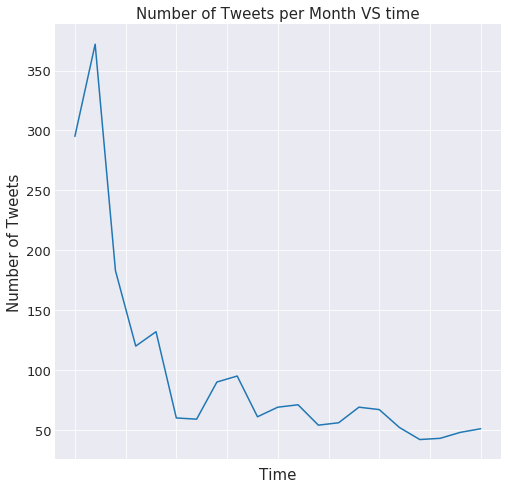

In [34]:
sns.set_style('darkgrid')
twitter_all_data_df_copy['timestamp'] = pd.to_datetime(twitter_all_data_df_copy['timestamp'])
twitter_all_data_df_copy['hour']=twitter_all_data_df_copy.timestamp.dt.hour
twitter_all_data_df_copy['month']=twitter_all_data_df_copy.timestamp.dt.month
twitter_all_data_df_copy['year']=twitter_all_data_df_copy.timestamp.dt.year
x=twitter_all_data_df_copy.groupby(['year','month'])['tweet_id'].count()[:-1]
x.plot.line(figsize=(8,8),fontsize=13,label="Retweet")
plt.ylabel('Number of Tweets',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.title('Number of Tweets per Month VS time',fontsize=15)

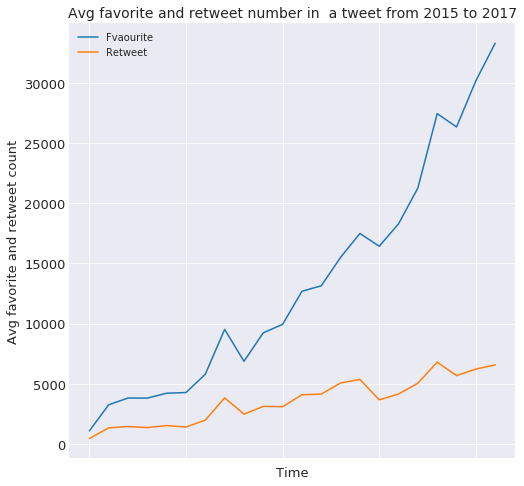

In [35]:
twitter_all_data_df_copy.groupby(['year','month'])['favorite_count'].mean().plot.line(figsize=(8,8),fontsize=13,label="Fvaourite")
twitter_all_data_df_copy.groupby(['year','month'])['retweet_count'].mean().plot.line(figsize=(8,8),fontsize=13,label="Retweet")
#twitter.groupby(['year','month'])['tweet_id'].count().plot.line(figsize=(8,8),fontsize=10,label="Retweet")
plt.xlabel('Time',fontsize=13)
plt.ylabel('Avg favorite and retweet count',fontsize=13)
plt.title('Avg favorite and retweet number in  a tweet from 2015 to 2017',fontsize=14)
plt.legend()

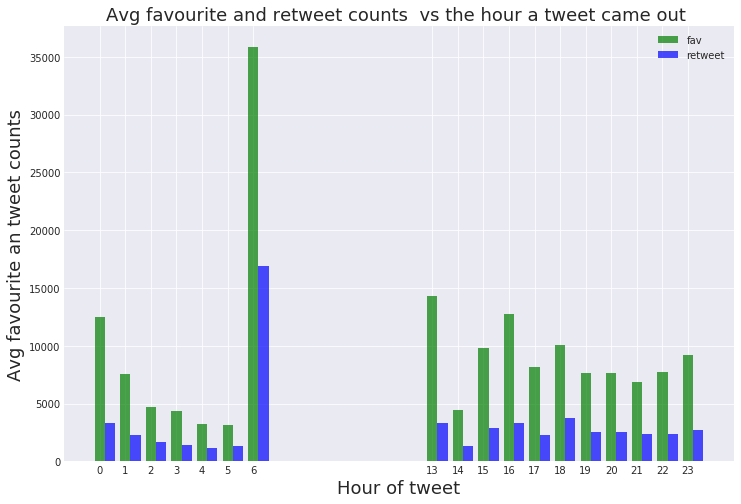

In [36]:

x=twitter_all_data_df_copy.groupby('hour')['favorite_count'].mean()
y=twitter_all_data_df_copy.groupby('hour')['retweet_count'].mean()
plt.figure(figsize=(12,8))
fav = plt.bar(x.index, x , .4, color='g', alpha=.7, label='fav')
ret = plt.bar(y.index + .4, y , .4, color='b', alpha=.7, label='retweet')
ind = np.arange(len(x.index))
plt.ylabel('Avg favourite an tweet counts',fontsize=18)
plt.xlabel('Hour of tweet',fontsize=18)
plt.title('Avg favourite and retweet counts  vs the hour a tweet came out ',fontsize=18)
labels=x.index
locations = labels
plt.xticks(locations, labels)
plt.legend()

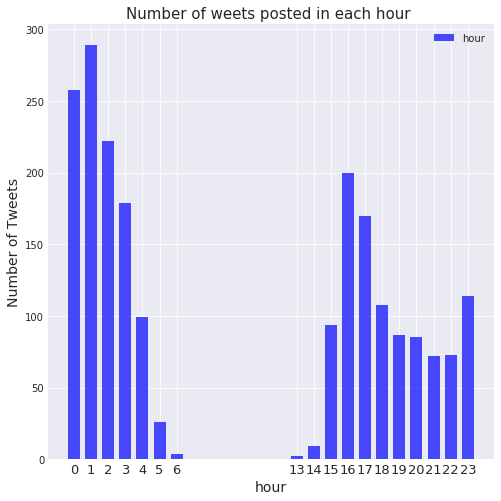

In [37]:
ind =np.arange(len(range(25))) 
# sales['date'].dt.hour  
x=twitter_all_data_df_copy.groupby('hour')['tweet_id'].count()
plt.figure(figsize=(8,8))
hour = plt.bar(x.index,x, .7, color='b', alpha=.7, label='hour')
plt.ylabel('Number of Tweets',fontsize=14)
plt.xlabel('hour',fontsize=14)
plt.title('Number of weets posted in each hour ',fontsize=15)
locations = x.index # xtick locations
labels = x.index  # xtick labels
plt.xticks(locations, labels,fontsize=13)
plt.xticks(fontsize=13)
plt.legend()

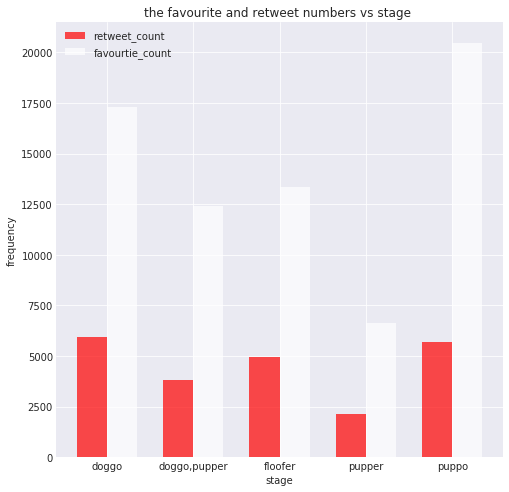

In [38]:
# plot bars
favorite_count=twitter_all_data_df_copy.groupby('stage')['favorite_count'].mean()
retweet_count=twitter_all_data_df_copy.groupby('stage')['retweet_count'].mean()
sns.set_style('darkgrid')
ind =np.arange(len(retweet_count)) 
width=0.35
plt.figure(figsize=(8,8))
red_bars = plt.bar(ind,retweet_count, width, color='r', alpha=.7, label='retweet_count')
white_bars = plt.bar(ind + width,favorite_count, width, color='w', alpha=.7, label='favourtie_count')

# title and labels
plt.ylabel('frequency')
plt.xlabel('stage')
plt.title('the favourite and retweet numbers vs stage ')
locations = ind + width / 2  # xtick locations
labels = retweet_count.index  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

Text(0,0.5,'')

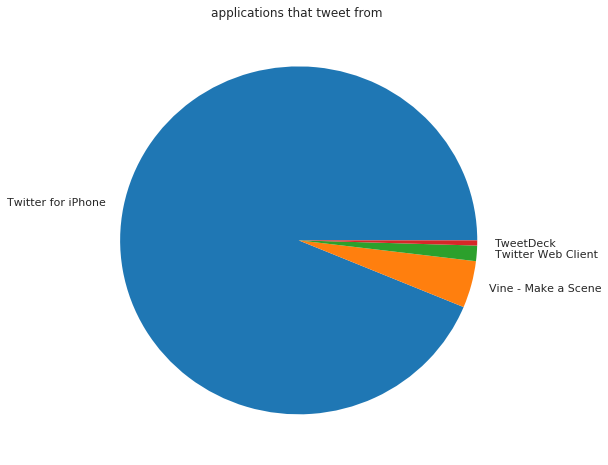

In [39]:
twitter_all_data_df_copy['source'].value_counts().plot.pie(figsize=(8,8),fontsize=11)
plt.title('applications that tweet from ')
plt.ylabel("")

In [40]:
twitter_all_data_df_copy['name'].value_counts()[1:11]


Charlie    11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        8
Toby        7
Daisy       7
Name: name, dtype: int64

# the following part is the visualization  using breeds of dogs
- plot highest 12 breeds of dogs appeared in tweets 
- plot highest 12 breeds of dogs got highest number of favourite and retweets 

Text(0,0.5,"Dog's Breed")

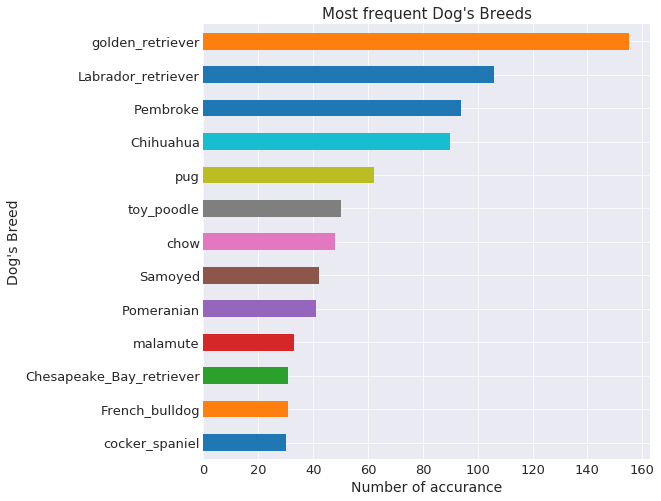

In [41]:
x=twitter_archive_master.groupby('prediction')['tweet_id'].count().sort_values(ascending=False)[12::-1].plot(kind='barh',figsize=(8,8), fontsize=13)
plt.title("Most frequent Dog's Breeds",fontsize=15)
plt.xlabel("Number of accurance",fontsize=14)
plt.ylabel("Dog's Breed",fontsize=14)

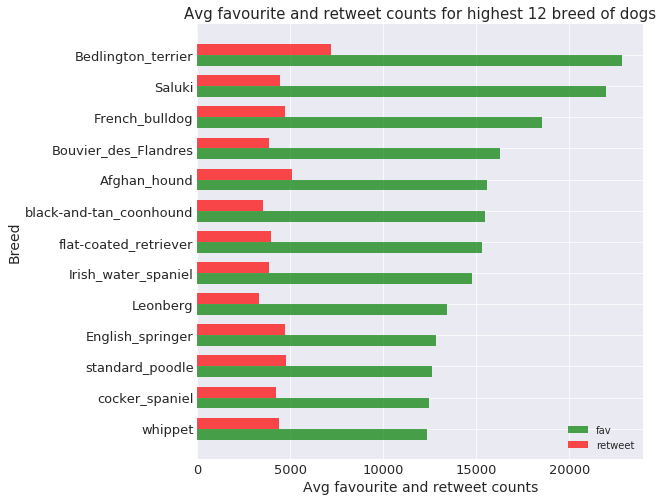

In [42]:
lis_df=[]
x=twitter_archive_master.groupby('prediction')['favorite_count'].mean().sort_values(ascending=False)[12::-1]
temp=twitter_archive_master.groupby('prediction')['retweet_count'].mean().sort_values(ascending=False)

for i in x.index :
    retweet=temp[i]
    lis_df.append({"breed":i,"retweet":retweet})
var_df= pd.DataFrame(lis_df)
z=var_df['retweet']

plt.figure(figsize=(8,8))
ind = np.arange(len(x.index))
fav = plt.barh(ind  , x , .35, color='g', alpha=.7, label='fav')
retweet = plt.barh(ind + .35 ,z,.35,color='r', alpha=.7, label='retweet')
labels= x.index # xtick locations
locations =ind +.35/2
plt.yticks(locations, labels,fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Avg favourite and retweet counts",fontsize=14)
plt.ylabel("Breed",fontsize=14)
plt.title("Avg favourite and retweet counts for highest 12 breed of dogs",fontsize=15)
plt.legend()